In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle

## Regression Exercises

1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Explore your dataset with any other visualizations you think will be helpful.

7. In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.

In [5]:
# acquire and prep my data using the functions from my wrangle.py
df = wrangle.prep_telco(wrangle.get_telco_data())

In [6]:
df.head()

,index,customer_id,monthly_charges,tenure,total_charges
0,5348,0040-HALCW,20.4,54,1090.60
1,5349,0042-RLHYP,19.7,69,1396.90
2,5350,0057-QBUQH,25.1,43,1070.15
3,5351,0064-SUDOG,20.3,12,224.50
4,5352,0071-NDAFP,25.5,25,630.60


In [4]:
# split my data
train, validate, test = wrangle.telco_split(df)

train---> (943, 5)
validate---> (405, 5)
test---> (337, 5)


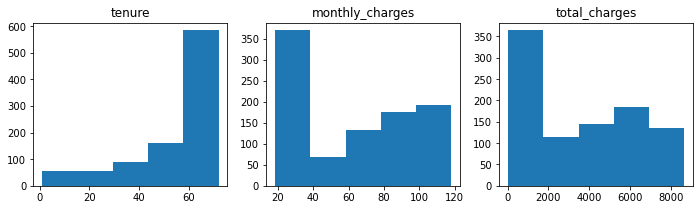

In [7]:
# take a quick look at visuals
plt.figure(figsize=(16, 3))

# List of columns
cols = ['tenure', 'monthly_charges', 'total_charges']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,4, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    train[col].hist(bins=5)
    
    # Hide gridlines.
    plt.grid(False)

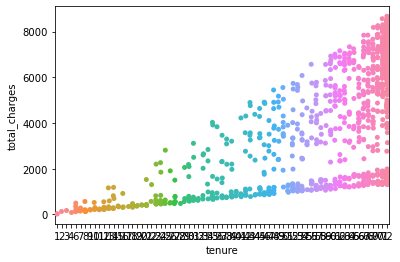

In [10]:
sns.stripplot(data = train, x = 'tenure', y = 'total_charges')
plt.show()

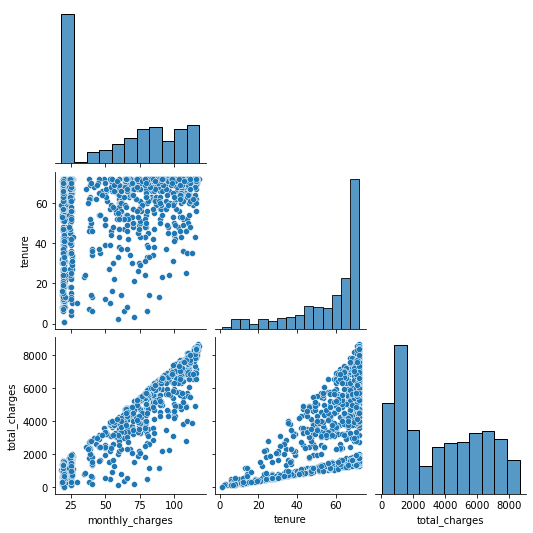

In [22]:
sns.pairplot(train.drop(columns=['index']), corner=True)
plt.show()

In [25]:
corr = train.drop(columns=['index']).corr()
corr

,monthly_charges,tenure,total_charges
monthly_charges,1.000000,0.415513,0.942865
tenure,0.415513,1.000000,0.635958
total_charges,0.942865,0.635958,1.000000


#### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

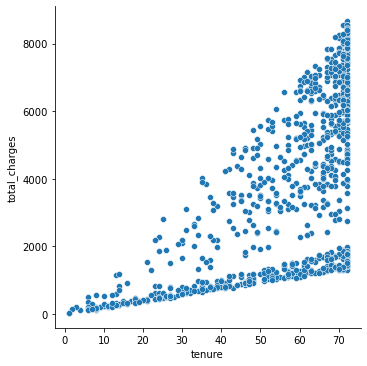

In [24]:
sns.relplot(data = train, x = 'tenure', y = 'total_charges')

<AxesSubplot:>

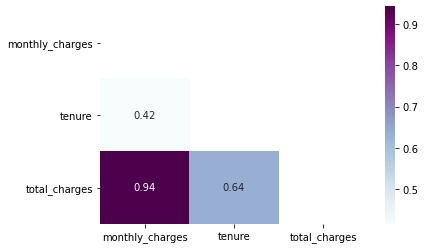

In [34]:
sns.heatmap(corr, cmap='BuPu', annot = True, mask = np.triu(corr))

In [35]:
def plot_variable_pairs(df):
    sns.pairplot(df, corner = True, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

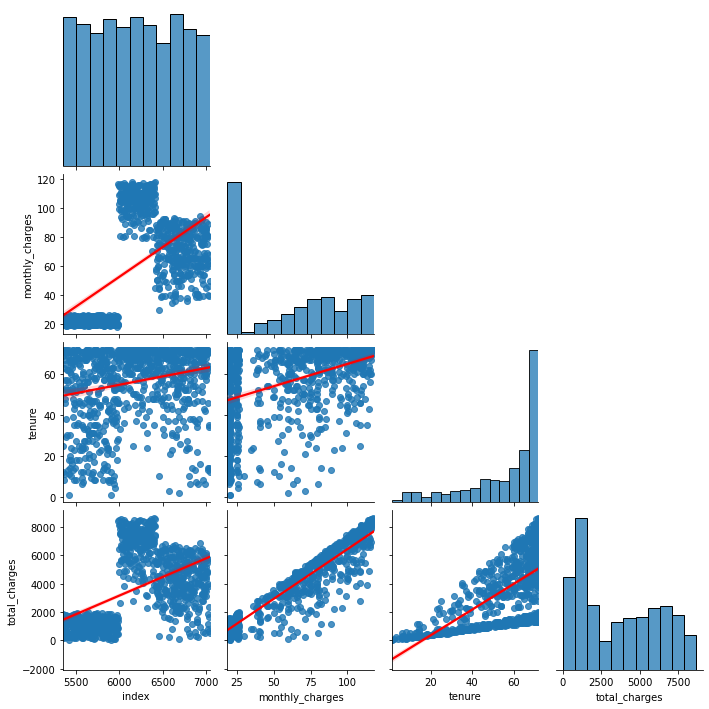

In [36]:
plot_variable_pairs(train)

#### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.



In [38]:
train.tenure // 12

360     1
1165    6
1091    5
574     5
1421    6
       ..
1535    5
356     2
896     5
997     6
1389    4
Name: tenure, Length: 943, dtype: int64

In [42]:
def months_to_years(df):
    '''
    This function takes in a dataframe and changes the tenure column from months
    to years by dividing it by 12. It also auto changes to int data type.
    '''
    df['tenure_years'] = df.tenure // 12
    return df

In [45]:
months_to_years(train)
months_to_years(validate)
months_to_years(test)

,index,customer_id,monthly_charges,tenure,total_charges,tenure_years
304,5656,4807-IZYOZ,20.65,51,1020.75,4
450,5802,7115-IRDHS,24.65,72,1830.05,6
909,6262,6650-BWFRT,117.15,72,8529.50,6
1411,6769,5893-PYOLZ,81.80,56,4534.45,4
1547,6905,7860-UXCRM,74.50,63,4674.55,5
...,...,...,...,...,...,...
1632,6990,9225-BZLNZ,85.25,72,6083.10,6
457,5809,7242-EDTYC,19.55,44,819.95,3
1161,6515,1837-YQUCE,58.35,70,4214.25,5
1074,6427,0244-LGNFY,92.65,72,6733.00,6


In [46]:
train.head()

,index,customer_id,monthly_charges,tenure,total_charges,tenure_years
360,5712,5696-EXCYS,19.45,17,369.05,1
1165,6519,1951-IEYXM,90.60,72,6441.85,6
1091,6444,0440-EKDCF,60.15,62,3753.20,5
574,5927,8966-SNIZF,19.45,70,1303.50,5
1421,6779,6034-ZRYCV,54.20,72,3937.45,6


#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.